## Quick & Easy Plotting Data Using Pandas
We can plot our summary stats using Pandas, too. First, to enable plots to appear in our notebook, we use the 'magic' command `%matplotlib inline`. (Note, if you use `%matplotlib notebook` instead, you get *interactive* plots, but they can be a bit less reliable...)

Documentation on plotting in Pandas is here:<br> http://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot

Let't try a few examples:

In [1]:
#Import pandas
import pandas as pd
# make sure figures appear inline in Ipython Notebook
%matplotlib inline

In [2]:
#Read in the surveys.csv file
surveys_df = pd.read_csv('../data/surveys.csv')
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [4]:
#Group data by species id and compute row counts
species_counts = surveys_df.groupby('species_id')['record_id'].count()
species_counts

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

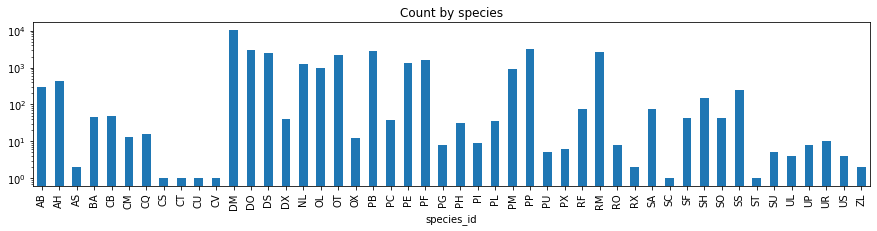

In [5]:
# create a quick bar chart by setting `kind` to 'bar'
species_counts.plot(kind='bar',
                    figsize=(15,3),           #Sets the size of the plot
                    title='Count by species', #Sets the title
                    logy=True);               #Converts y axis to log scale

---
### <font color='red'>Challenge - Plots</font>
1. Create a plot of **average weight** across all **species** per plot.<br>*Hint: you first need to summarize the data on plot_id, computing mean of the weigth column, then follow the syntax above.* 

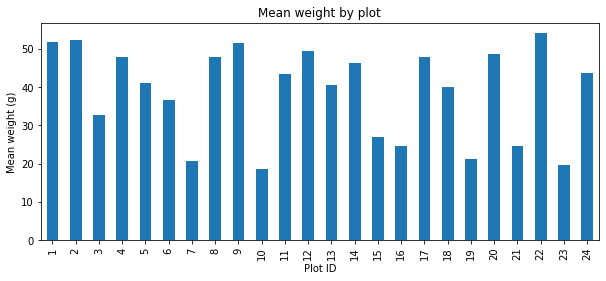

In [6]:
#Challenge 1: Plot average weight per plot
data = surveys_df.groupby('plot_id').mean()['weight']
#Create a plot as the variable "ax"
ax = data.plot(kind='bar',
               title="Mean weight by plot",
               figsize = (10,4))
#Set axis labels for the "ax" plot
ax.set(xlabel='Plot ID',
       ylabel='Mean weight (g)');

2. Create a pie chart showing the proportion _record_ids_ of _males versus females_ for the entire dataset.  
*Hint: you need to group on sex and then compute the count of record_ids in the resulting grouped object.* 

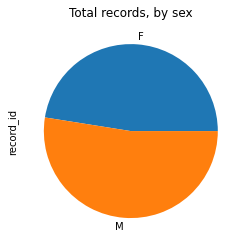

In [10]:
#Challenge 2:
data = surveys_df.groupby('sex').count()['record_id']
data.plot(kind='pie',title='Total records, by sex');

Some other options...

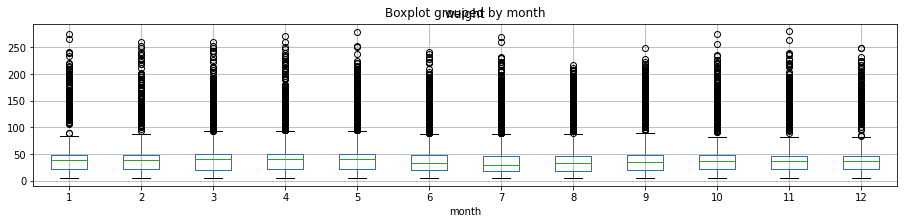

In [11]:
#Pandas has lots of plotting options...
surveys_df.boxplot(column=['weight'],by='month',figsize=(15,3));

---
### Advanced Plotting...</font>
Create a stacked bar plot, with weight on the Y axis, and the stacked variable being `sex`. The plot should show total weight by sex for each plot. Some tips are below to help you solve this challenge:

* For more on Pandas plots, visit this link: http://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot
* You can use the code that follows to create a stacked bar plot but the data to stack need to be in individual columns. Here’s a simple example with some data where ‘a’, ‘b’, and ‘c’ are the groups, and ‘one’ and ‘two’ are the subgroups.

In [12]:
d = {'one' : pd.Series([1., 2., 3.], 
                       index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], 
                       index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


We can plot the above with:

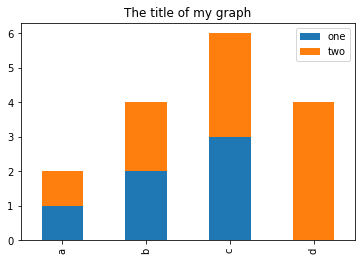

In [13]:
# plot stacked data so columns 'one' and 'two' are stacked
my_df = pd.DataFrame(d)
my_df.plot(kind='bar',stacked=True,title="The title of my graph");

*  You can use the .unstack() method to transform grouped data into columns for each plotting. Try running `.unstack()` on some DataFrames above and see what it yields.

Start by transforming the grouped data (by plot and sex) into an unstacked layout, then create a stacked plot.

In [14]:
#Group data by plot and by sex, and then calculate a sum of weights for each plot.
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
plot_sex_count = by_plot_sex['weight'].sum()
plot_sex_count

plot_id  sex
1        F      38253.0
         M      59979.0
2        F      50144.0
         M      57250.0
3        F      27251.0
         M      28253.0
4        F      39796.0
         M      49377.0
5        F      21143.0
         M      23326.0
6        F      26210.0
         M      27245.0
7        F       6522.0
         M       6422.0
8        F      37274.0
         M      47755.0
9        F      44128.0
         M      48727.0
10       F       2359.0
         M       2776.0
11       F      34638.0
         M      43106.0
12       F      51825.0
         M      57420.0
13       F      24720.0
         M      30354.0
14       F      32770.0
         M      46469.0
15       F      12455.0
         M      11037.0
16       F       5446.0
         M       6310.0
17       F      42106.0
         M      48082.0
18       F      27353.0
         M      26433.0
19       F      11297.0
         M      11514.0
20       F      33206.0
         M      25988.0
21       F      15481.0
   

Below we’ll use `.unstack()` on our grouped data to figure out the total weight that each sex contributed to each plot.

In [16]:
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
plot_sex_count = by_plot_sex['weight'].sum()
dfPlotSex = plot_sex_count.unstack()
dfPlotSex

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0
6,26210.0,27245.0
7,6522.0,6422.0
8,37274.0,47755.0
9,44128.0,48727.0


Now, create a stacked bar plot with that data where the weights for each sex are stacked by plot.

Rather than display it as a table, we can plot the above data by stacking the values of each sex as follows:

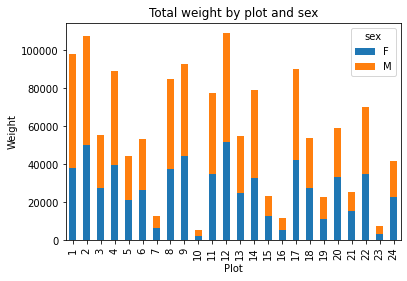

In [17]:
s_plot = dfPlotSex.plot(kind='bar',stacked=True,title="Total weight by plot and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Plot");